The main objective is:

To build a machine learning model that can accurately classify credit card transactions as either fraudulent (fraud) or legitimate (non-fraud), even when fraud cases are very rare compared to legitimate ones.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("/Users/apple/Desktop/Machine-Learning/csv's/creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

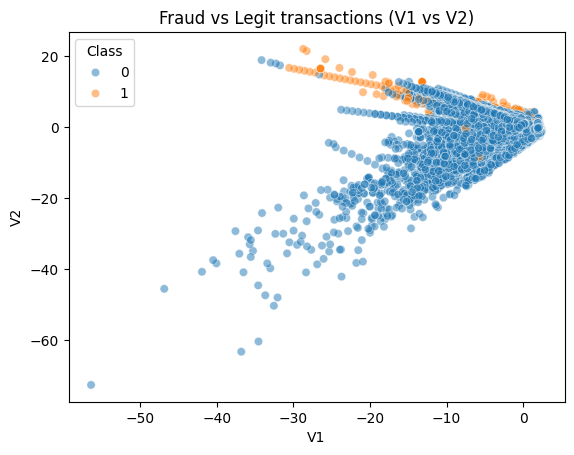

In [3]:
sns.scatterplot(x="V1", y="V2", hue="Class", data=data, alpha=0.5)
plt.title("Fraud vs Legit transactions (V1 vs V2)")
plt.show()

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
X = data.drop(columns='Class', axis=1)
y = data["Class"]
train_X, test_X, train_Y, test_Y = train_test_split(X, y, train_size=0.2, random_state=42)

In [6]:
from xgboost import XGBClassifier 

In [8]:

params = {
    "n_estimators": 300,      # smaller than 1000
    "max_depth": 5,           # not too deep
    "learning_rate": 0.1,     # decent default
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "n_jobs": -1,             # use all CPU cores
    "tree_method": "hist"     
}
model = XGBClassifier(**params)

model.fit(
    train_X, train_Y,

)

y_pred = model.predict(test_X)

print("\nAccuracy Score:\n", accuracy_score(test_Y, y_pred))
print("\nClassification Report:\n", classification_report(test_Y, y_pred))



Accuracy Score:
 0.9994777174056161

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227459
           1       0.96      0.73      0.83       387

    accuracy                           1.00    227846
   macro avg       0.98      0.86      0.91    227846
weighted avg       1.00      1.00      1.00    227846

